In [ ]:
# Atualizar a bibliotecas do colab, depois de atualizar reinicie o ambiente de exucução(runtime)
#!pip install arch
#!pip install quandl
#!pip install warnings
!pip install pmdarima
#!pip install --upgrade --no-deps numpy
!pip install --upgrade --no-deps pandas
!pip install --upgrade --no-deps matplotlib
!pip install --upgrade --no-deps statsmodels
#!pip install --upgrade --no-deps quandl
#!pip install --upgrade --no-deps pmdarima
#!pip install --upgrade --no-deps warnings
#!pip install -U pandas-profiling
!pip install pingouin



<h3>About the dataset</h3>
<p>Time Series Energy Data (electricity prices, electricity consumption, wind and solar power generation and capacities. Data available in half-hourly (30 min) resolution.&nbsp;</p>
<p>&nbsp;</p>
<p>Period covered:&nbsp;2014-12-31</p>
<p>Countries: Cyprus, United Kingdom, Ireland</p>
<p>&nbsp;</p>
<p>Source: <a href="https://data.open-power-system-data.org/time_series/2020-10-06">https://data.open-power-system-data.org/time_series/2020-10-06</a></p>
<p>Provided by: TSOs and power exchanges via ENTSO-E Transparency,&nbsp;</p>
<h3>&nbsp;</h3>
<h3>About the Problem</h3>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<h3>Working group - 7</h3>
<ul>
<li>Andr&eacute; Dias</li>
<li>Hugo</li>
<li>Thiago Borba</li>
<li>Tiago Ferreira da Silva</li>
</ul>
<h3>&nbsp;</h3>
<h3>Notebook Index</h3>
<p>- EDA (descriptive statistics, Visualization, time series trends/sazonality, resample analysis,&nbsp;</p>
<p>- Correlation and Autocorrelation</p>
<p>- Classical Time Series Models</p>
<ul class="i8Z77e">
<li class="TrT0Xe">Autoregressive models
<ul class="i8Z77e">
<li class="TrT0Xe">Autoregressive conditional heteroskedasticity (ARCH) model.</li>
<li class="TrT0Xe">Autoregressive integrated moving average (ARIMA) model.</li>
<li class="TrT0Xe">Autoregressive (AR) model.</li>
<li class="TrT0Xe">Autoregressive&ndash;moving-average (ARMA) model.</li>
<li class="TrT0Xe">Generalized autoregressive conditional heteroskedasticity (GARCH) model.</li>
<li class="TrT0Xe">Moving-average (MA) model</li>
</ul>
</li>
</ul>
<ul class="i8Z77e">
<li class="TrT0Xe">Linear Regression</li>
</ul>
<p>- Deep Learning Methods</p>
<ul>
<li>
<p>Multi-Layer Perceptron (MLP)</p>
</li>
<li>
<p>Recurrent Neural Network (RNN)</p>
</li>
<li>
<p>Long Short-Term Memory (LSTM)</p>
</li>
</ul>





# Data Understanding

### Carregando os dados



In [ ]:
# Importar as bibliotecas para começar a fase de Data understanding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DatetimeIndex as dt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [ ]:

import pingouin as pg

####Index30min

In [ ]:
# Caregar a base de dados Index30min para um data frame df_30
df_30 = pd.read_csv("/content/drive/MyDrive/Trabalho_grupo_análise_séries_temporais/time_series_30min_singleindex.csv", parse_dates=['utc_timestamp'], index_col=0)


In [ ]:
solar_wind_IE = pd.read_csv("/content/drive/MyDrive/Trabalho_grupo_análise_séries_temporais/Solar_Wind_IE.csv")

In [ ]:
#Remover cet_cest_timestamp pq não precisa de dois horários diferentes
#Remover as colunas CY, além de terem muitos valors missing, o que raios cyprus tem a a ver com a Irland?!
df_30 = df_30.drop(columns = ["CY_load_actual_entsoe_transparency", "CY_load_forecast_entsoe_transparency", "CY_wind_onshore_generation_actual","cet_cest_timestamp"])

In [ ]:
#Entender onde a série de preços começa
#entre 28 de Setembro de  2018 a 30 de Setembro de 2018 o mercado não funcionou, ver link:
#https://transparency.entsoe.eu/transmission-domain/r2/dayAheadPrices/show?name=&defaultValue=false&viewType=TABLE&areaType=BZN&atch=false&dateTime.dateTime=29.09.2018+00:00|UTC|DAY&biddingZone.values=CTY|10YIE-1001A00010!BZN|10Y1001A1001A59C&resolution.values=PT60M&dateTime.timezone=UTC&dateTime.timezone_input=UTC
df_30.dropna(subset=['IE_sem_price_day_ahead']).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64096 entries, 2015-01-01 06:30:00+00:00 to 2018-09-28 23:00:00+00:00
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   GB_GBN_load_actual_entsoe_transparency    64092 non-null  float64
 1   GB_GBN_load_forecast_entsoe_transparency  64096 non-null  float64
 2   GB_GBN_solar_capacity                     64096 non-null  float64
 3   GB_GBN_solar_generation_actual            64010 non-null  float64
 4   GB_GBN_solar_profile                      64010 non-null  float64
 5   GB_GBN_wind_capacity                      64096 non-null  float64
 6   GB_GBN_wind_generation_actual             64016 non-null  float64
 7   GB_GBN_wind_profile                       64016 non-null  float64
 8   GB_GBN_wind_offshore_capacity             64096 non-null  float64
 9   GB_GBN_wind_offshore_generation_actual    64016 non-null  

In [ ]:
#pegar os dados a partir de quando começam os price-day-ahead
df_30 = df_30.loc['2015-01-01 7:00':]
df_30.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100786 entries, 2015-01-01 07:00:00+00:00 to 2020-09-30 23:30:00+00:00
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   GB_GBN_load_actual_entsoe_transparency    100773 non-null  float64
 1   GB_GBN_load_forecast_entsoe_transparency  100545 non-null  float64
 2   GB_GBN_solar_capacity                     87586 non-null   float64
 3   GB_GBN_solar_generation_actual            100684 non-null  float64
 4   GB_GBN_solar_profile                      87497 non-null   float64
 5   GB_GBN_wind_capacity                      87586 non-null   float64
 6   GB_GBN_wind_generation_actual             100701 non-null  float64
 7   GB_GBN_wind_profile                       87502 non-null   float64
 8   GB_GBN_wind_offshore_capacity             87586 non-null   float64
 9   GB_GBN_wind_offshore_generation_actual    1007

In [ ]:
for i in ['IE_sem_load_forecast_entsoe_transparency','GB_UKM_load_forecast_entsoe_transparency','IE_wind_onshore_generation_actual']:
 df_30[i].interpolate(method='linear', inplace=True)

In [ ]:
#pegar os dados a partir de quando começam os price-day-ahead transformar os dados em frequência de uma em uma hora. 
df_30_mean = df_30['IE_sem_price_day_ahead'].resample("h").mean()
df_30_sum  = df_30[['IE_sem_load_forecast_entsoe_transparency','GB_UKM_load_forecast_entsoe_transparency','IE_wind_onshore_generation_actual']].resample("h").sum()
df_30 = df_30_sum.merge(df_30_mean, right_index=True, left_index=True)

In [ ]:
df_30.loc[]

,IE_sem_load_forecast_entsoe_transparency,GB_UKM_load_forecast_entsoe_transparency,IE_wind_onshore_generation_actual,IE_sem_price_day_ahead
utc_timestamp,,,,
2015-01-01 07:00:00+00:00,0.00,0.00,3049.16,29.57
2015-01-01 08:00:00+00:00,0.00,0.00,2938.08,29.57
2015-01-01 09:00:00+00:00,0.00,0.00,2828.10,29.63
2015-01-01 10:00:00+00:00,0.00,0.00,3068.58,32.76
2015-01-01 11:00:00+00:00,0.00,0.00,3363.38,34.96
...,...,...,...,...
2020-09-30 19:00:00+00:00,10896.65,71002.65,985.33,NaN
2020-09-30 20:00:00+00:00,10091.43,63480.43,924.87,NaN
2020-09-30 21:00:00+00:00,9165.08,55595.08,789.69,NaN


####Day_ahead_prices

In [ ]:
#carregar a base de dados com os preços que falta no df_index30
df_prices = pd.read_csv("/content/drive/MyDrive/Trabalho_grupo_análise_séries_temporais/Day-ahead Price.csv", 
                        parse_dates=["MTU (UTC)"], 
                        index_col = 0)

In [ ]:
# verificar se as séries tem o mesmo tamanho
df_30.loc["2018-09-30 22:00:00":].shape[0] == df_prices.shape[0]

True

In [ ]:
#preencher a serie com os novos preços
df_30.loc["2018-09-30 22:00:00":]['IE_sem_price_day_ahead'] = df_prices['Day-ahead Price [EUR/MWh]'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_30.isna().sum()

IE_sem_load_forecast_entsoe_transparency    0
GB_UKM_load_forecast_entsoe_transparency    0
IE_wind_onshore_generation_actual           0
IE_sem_price_day_ahead                      0
dtype: int64

In [ ]:
df_30[df_30['IE_sem_price_day_ahead'].isnull()]

In [ ]:
# Impute missings
df_test = df_30.assign(InterpolateSLinear=df_30.IE_sem_price_day_ahead.interpolate(method='slinear'))
df_30['IE_sem_price_day_ahead'] = df_test['InterpolateSLinear']

###Entendendo os dados

In [ ]:
  #algumas variaveis param de ser copntadas a partir de 2020 e a variável GB_NIR load forecast está fora do esperado para variável a partir de 2020. Não parecem ser valores corretos
  #solução 1: pegar os dados restantes no site
  #solução 2: diminuir a série de dados para final de 2020
  fig, axs = plt.subplots(nrows=len(df_30.columns), figsize = (25,20))
  fig.tight_layout(pad=3.0)
  for i, variable in enumerate(df_30.columns.values):
    df_30[variable].plot(ax=axs[i], title=variable)
  plt.savefig("Gráficos_linhas.png")

In [ ]:
#calcular a matrix de correlação e salvar em uma variável
corr = df_30.corr()
corr['IE_sem_price_day_ahead'].sort_values(ascending = False)

IE_sem_price_day_ahead                      1.000000
GB_UKM_load_forecast_entsoe_transparency    0.366309
IE_sem_load_forecast_entsoe_transparency    0.340411
IE_wind_onshore_generation_actual          -0.176973
Name: IE_sem_price_day_ahead, dtype: float64

In [ ]:
#Plotar a matriz de correlação
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(30, 30))
sns.heatmap(corr, annot = True, mask = mask, fmt = '.2f', annot_kws={"size": 10}, 
            cmap=sns.diverging_palette(10, 240, as_cmap=True), )

plt.title('Correlation Matrix', fontsize=15 )
plt.savefig("Matrix_correlação.png")


In [ ]:
#Escolhendo as variaveis para usar no modelo arimax / arima. as variaveis dummies já estão implicitas nas previsões (forecast)
df_arima = df_30[['GB_GBN_load_forecast_entsoe_transparency',\
                  'GB_UKM_load_forecast_entsoe_transparency',\
                 'GB_GBN_wind_offshore_generation_actual',\
                 'GB_NIR_load_forecast_entsoe_transparency',\
                 'GB_NIR_wind_onshore_generation_actual',\
                 'IE_sem_load_forecast_entsoe_transparency',\
                 'IE_wind_onshore_generation_actual',\
                 'IE_sem_price_day_ahead']]

In [ ]:
df_arima = df_30.drop(['GB_UKM_load_forecast_entsoe_transparency','IE_wind_onshore_generation_actual'], axis = 1)

In [ ]:
df_arima = df_arima.loc['2019-01-01':'2019-12-31']

In [ ]:
df_arima

,IE_sem_load_forecast_entsoe_transparency,IE_sem_price_day_ahead
utc_timestamp,,
2019-01-01 00:00:00+00:00,8341.85,70.28
2019-01-01 01:00:00+00:00,7742.92,65.18
2019-01-01 02:00:00+00:00,7282.14,60.91
2019-01-01 03:00:00+00:00,6977.51,65.16
2019-01-01 04:00:00+00:00,6897.82,65.16
...,...,...
2019-12-31 19:00:00+00:00,10783.18,50.00
2019-12-31 20:00:00+00:00,10112.41,46.00
2019-12-31 21:00:00+00:00,9423.62,42.37


In [ ]:
df_arima['IE_sem_wind_forecast'] = solar_wind_IE['Generation - Wind Onshore  [MW] Day Ahead/ BZN|IE(SEM)'].values

In [ ]:
df_arima.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Freq: H
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   IE_sem_load_forecast_entsoe_transparency  8760 non-null   float64
 1   IE_sem_price_day_ahead                    8760 non-null   float64
 2   IE_sem_wind_forecast                      8760 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 273.8 KB


In [ ]:
for i in df_arima.columns:
 df_arima[i].interpolate(method='linear', inplace=True)

In [ ]:
df_arima.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Freq: H
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   IE_sem_load_forecast_entsoe_transparency  8760 non-null   float64
 1   GB_UKM_load_forecast_entsoe_transparency  8760 non-null   float64
 2   IE_wind_onshore_generation_actual         8760 non-null   float64
 3   IE_sem_price_day_ahead                    8760 non-null   float64
dtypes: float64(4)
memory usage: 342.2 KB


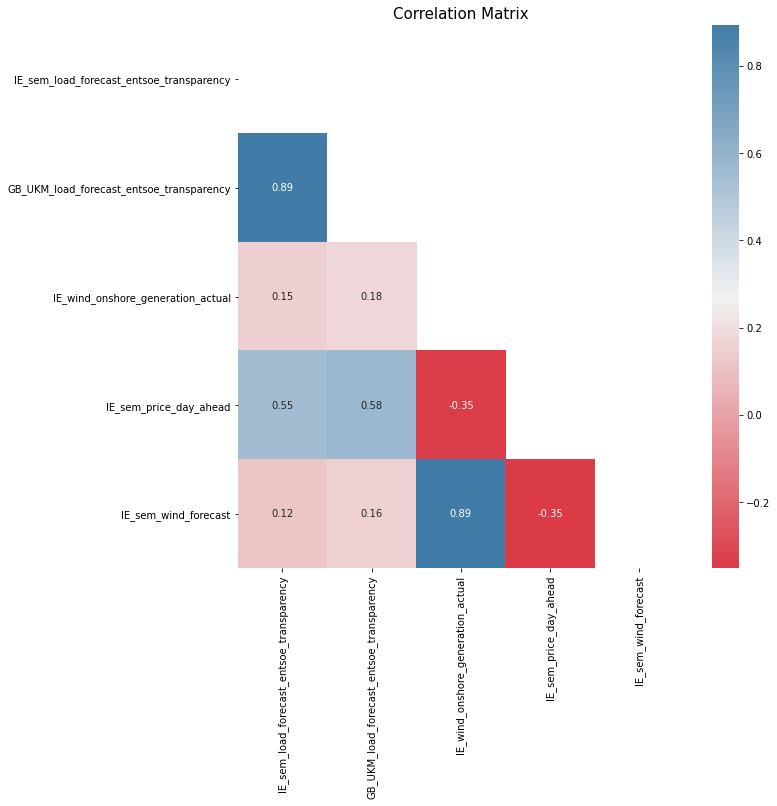

In [ ]:
#Crinado o correlograma para as variáveis escolhidas. Percebe-se que as vairaveis forecast estão fortemente correlacionadas, provavelmente por conta de tendencia e sazonalidade, e devem ser tratadas
corr = 11df_arima.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot = True, mask = mask, fmt = '.2f', annot_kws={"size": 10}, 
            cmap=sns.diverging_palette(10, 240, as_cmap=True), )

plt.title('Correlation Matrix', fontsize=15 )
plt.savefig("Matrix_correlação.png")

In [ ]:
df_arima['Total_load'] = df_arima['IE_sem_load_forecast_entsoe_transparency'] + df_arima['GB_UKM_load_forecast_entsoe_transparency']

In [ ]:
df_arima.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Freq: H
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   IE_sem_load_forecast_entsoe_transparency  8760 non-null   float64
 1   GB_UKM_load_forecast_entsoe_transparency  8760 non-null   float64
 2   IE_wind_onshore_generation_actual         8760 non-null   float64
 3   IE_sem_price_day_ahead                    8760 non-null   float64
 4   Total_load                                8760 non-null   float64
dtypes: float64(5)
memory usage: 410.6 KB


In [ ]:
#por conta do problema da multicolianiredade sera deixa só algumas variáveis
df_arima = df_arima[['Total_load','IE_sem_wind_forecast','IE_sem_price_day_ahead']]

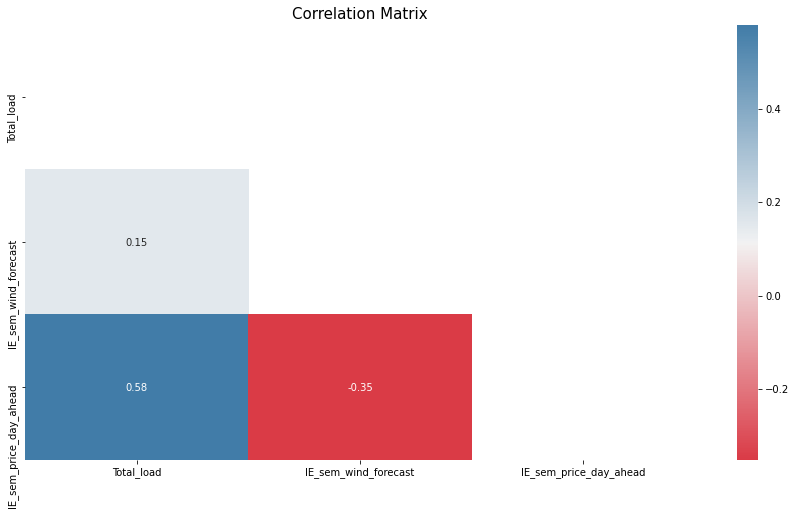

In [ ]:
corr = df_arima.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(15, 8))
sns.heatmap(corr, annot = True, mask = mask, fmt = '.2f', annot_kws={"size": 10}, 
            cmap=sns.diverging_palette(10, 240, as_cmap=True), )

plt.title('Correlation Matrix', fontsize=15 )
plt.savefig("Matrix_correlação.png")

In [ ]:
df_30.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50393 entries, 2015-01-01 07:00:00+00:00 to 2020-09-30 23:00:00+00:00
Freq: H
Data columns (total 50 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   GB_GBN_load_actual_entsoe_transparency    50387 non-null  float64
 1   GB_GBN_load_forecast_entsoe_transparency  50273 non-null  float64
 2   GB_GBN_solar_capacity                     43793 non-null  float64
 3   GB_GBN_solar_generation_actual            50346 non-null  float64
 4   GB_GBN_solar_profile                      43752 non-null  float64
 5   GB_GBN_wind_capacity                      43793 non-null  float64
 6   GB_GBN_wind_generation_actual             50354 non-null  float64
 7   GB_GBN_wind_profile                       43754 non-null  float64
 8   GB_GBN_wind_offshore_capacity             43793 non-null  float64
 9   GB_GBN_wind_offshore_generation_actual    50354 no

In [ ]:
# Funções para criar o ranking the correlações
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [ ]:
# Ranking de correlações
print("Top Absolute Correlations")
print(get_top_abs_correlations(df_30, 60))

Text(0.5, 1.0, 'IE_sem_price_day_ahead')

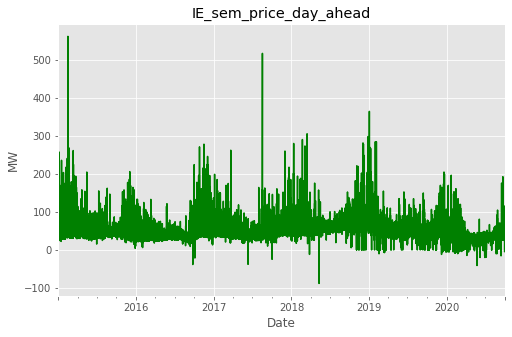

In [ ]:
# Plot the time series 
plt.style.use('ggplot')
ax = df_30['IE_sem_price_day_ahead'].plot(color='green', grid=True, figsize=(8,5))
ax.set_xlabel('Date')
ax.set_ylabel('MW')
ax.set_title('IE_sem_price_day_ahead')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  if __name__ == '__main__':


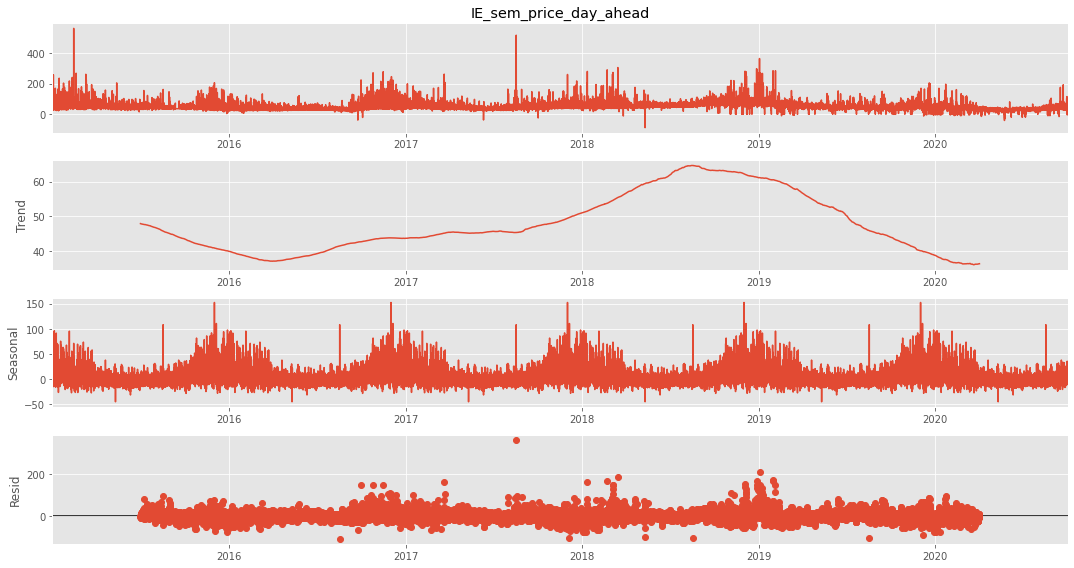

In [ ]:
# Decompondo os valores dos preços
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8
plt.style.use('ggplot')
ts1 = df_30['IE_sem_price_day_ahead']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model='additive',freq=8760)
result.plot()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8
plt.style.use('ggplot')

#### Stationarity and Unit root tests

- Stationarity is one of the basic building blocks of performing a time series analysis ortime series forecasting.
- statistical modeling methods assume or require the time series to be stationaryto be effective.
- The summary statistics of a stationary time series will remain constant or varyminimally over time. e.g. mean and variance
- "Types" of stationary:
    - Trend Stationary: A time series that does not exhibit a trend.
    - Seasonal Stationary: A time series that does not exhibit seasonality.
    - Strictly Stationary: A mathematical definition of a stationary process, specifically that the joint distribution of observations is invariant to time shift.
- If you have clear trend and seasonality in your time series, then model these components, remove them from observations, then train models on the residuals. 
- The statistical tests to analyse non-stationarity/ stationarity are called unit root tests /stationarity teste
- Unit root test H0: exists a unit root = non-stationary time-series (e. g., Augmented Dickey-Fuller ou ADF test, PP test)
- Stationarity test H0: stationary time series (e.g. KPss test)
- Reject the null if **p-value < 0.05** (where 0.05 is 5% significance level)

In [ ]:
# Checar se a média e a variância mudam na série temporal
X = df_30['IE_sem_price_day_ahead'].values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=43.852988, mean2=50.023944
variance1=350.660110, variance2=588.015707


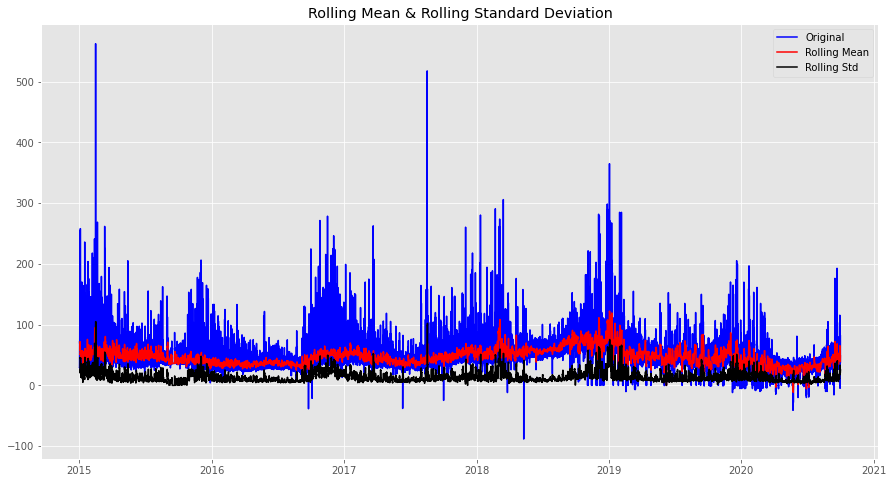

In [ ]:
#Checagem visual para ver se a média rolannte se altera na série temporal, em uma série estacionária a média rolante deve ser uma reta.
rcParams['figure.figsize'] = 15, 8
rolling_mean = df_30['IE_sem_price_day_ahead'].rolling(window = 24).mean()
rolling_std = df_30['IE_sem_price_day_ahead'].rolling(window = 24).std()
plt.plot(df_30['IE_sem_price_day_ahead'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

Unit root test (ADF test)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Teste p > 0,05 significa que rejeitamos a hipotese nulla que a serie não tem root units
# A série é uma série estacionária
data1 =  df_30['IE_sem_price_day_ahead'].values
adf1 = adfuller(data1, autolag='AIC')
adf1_result = pd.Series(adf1[0:4], index=['ADF Test Statistic','P-Value','# Lags Used',
                                        '# Observations Used'])
print(adf1_result)

ADF Test Statistic    -1.180853e+01
P-Value                8.975309e-22
# Lags Used            5.500000e+01
# Observations Used    5.033700e+04
dtype: float64


###Atucorrelação

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

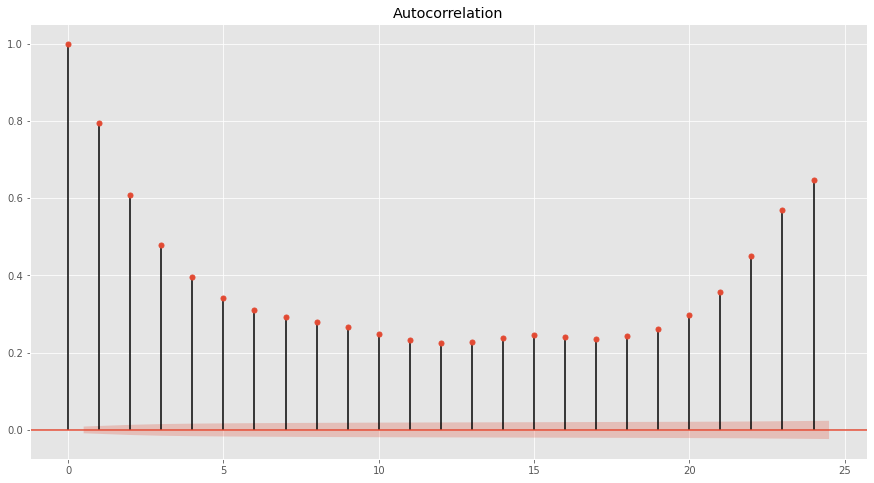

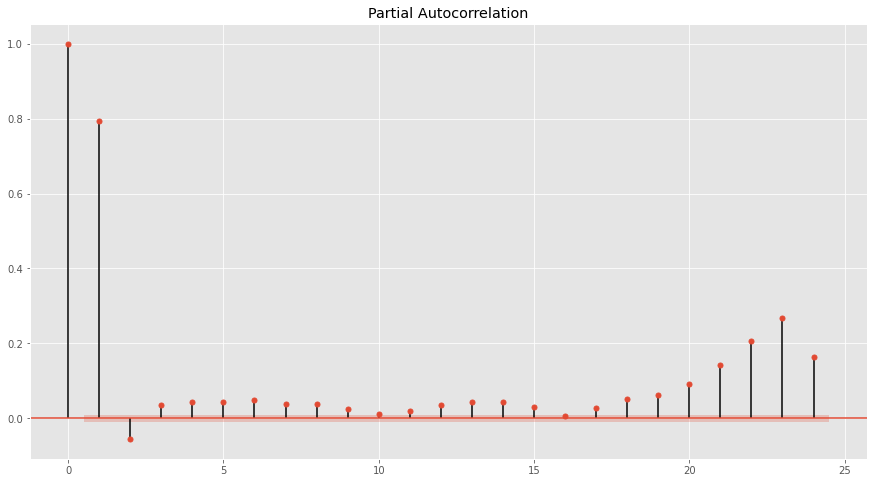

In [ ]:
# Verificar autocorrelação
plot_acf(df_30['IE_sem_price_day_ahead'], lags=24, alpha=0.05)
plot_pacf(df_30['IE_sem_price_day_ahead'], lags=24, alpha=0.05)
plt.show()

#Data Preparation


In [ ]:
df_arima.to_csv("/content/drive/MyDrive/Trabalho_grupo_análise_séries_temporais/df_arima.csv")

## Modeling

###Sarimax

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import pmdarima as pm
from sklearn.metrics import mean_squared_error

In [ ]:
df_arima.to_csv("/content/drive/MyDrive/Trabalho_grupo_análise_séries_temporais/df_arima.csv")

In [ ]:
df_arima = pd.read_csv("/content/drive/MyDrive/Trabalho_grupo_análise_séries_temporais/df_arima.csv", parse_dates=['utc_timestamp'], index_col=0)
#df_arima = diff_30

In [ ]:
# O auto arima não roda com mais de um ano de dados
df_arima = df_arima.loc['2019-01-01':'2019-12-31']

In [ ]:
df_arima.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   IE_sem_load_forecast_entsoe_transparency  8760 non-null   float64
 1   IE_sem_price_day_ahead                    8760 non-null   float64
 2   IE_sem_wind_forecast                      8760 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 273.8 KB


In [ ]:
#Fazer o teste ad fuller para a nova amostra de dados
result = adfuller(df_arima['IE_sem_price_day_ahead'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-9.454004134836005
4.536249835629853e-16
{'1%': -3.4310995387302516, '5%': -2.861871246211382, '10%': -2.566946317391388}


In [ ]:
df_train = df_arima.loc[:'2019-08-01']
df_test  = df_arima.loc['2019-08-02':]

In [ ]:
#Auto ARIMA
#Sera mesmo o melhor modelo?
stepwise_fit = pm.auto_arima(df_train['IE_sem_price_day_ahead'], 
                             start_p=1, #The starting value of P, the order of the auto-regressive portion of the seasonal model.
                             start_q=1, #The starting value of q, the order of the moving-average (“MA”) model. Must be a positive integer.
                             max_p=3,   #The maximum value of p, inclusive. Must be a positive integer greater than or equal to start_p.
                             max_q=3,   #The maximum value of q, inclusive. Must be a positive integer greater than start_q.
                             m=24,
                             max_P =3,
                             max_Q =1,#The period for seasonal differencing, m refers to the number of periods in each season. For example, m is 4 for quarterly data, 12 for monthly data, or 1 for annual (non-seasonal) data. Default is 1. Note that if m == 1 (i.e., is non-seasonal), seasonal will be set to False.
                             start_P=0,
                             max_D = 0,#The starting value of P, the order of the auto-regressive portion of the seasonal model.
                             seasonal=True,
                             stationary = True,
                             exog=df_train[['Total_load','IE_sem_wind_forecast']],
                             d=0,
                             D=1,
                             error_action='ignore', # don't want to know if an order does not work
                             uppress_warnings=True, # don't want convergence warnings
                             stepwise=True, # set to stepwise
                             trace = True) # show models found

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[24] intercept   : AIC=37629.555, Time=16.35 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=47433.589, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=37440.490, Time=14.04 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=41239.960, Time=14.49 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=56204.063, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=39333.519, Time=0.35 sec
 ARIMA(1,0,0)(2,0,0)[24] intercept   : AIC=inf, Time=52.82 sec
 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=26.96 sec
 ARIMA(1,0,0)(0,0,1)[24] intercept   : AIC=38220.789, Time=11.28 sec
 ARIMA(1,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=109.77 sec
 ARIMA(0,0,0)(1,0,0)[24] intercept   : AIC=44800.951, Time=11.88 sec
 ARIMA(2,0,0)(1,0,0)[24] intercept   : AIC=37099.114, Time=25.15 sec
 ARIMA(2,0,0)(0,0,0)[24] intercept   : AIC=38484.420, Time=0.54 sec
 ARIMA(2,0,0)(2,0,0)[24] intercept   : AIC=36694.846, Time=76.22 sec
 ARIMA(2,0,0

In [ ]:
print(stepwise_fit.summary())

In [ ]:
## Criar um auto-arima que não trava a o ambiente de execução

## Create empty list to store search results
#order_aic_bic=[]

## Loop over p values from 0-2
#for p in range(5):
  # Loop over q values from 0-2
    #for q in range(5):
      	# create and fit ARMA(p,q) model
        #model = SARIMAX(df_train['IE_sem_price_day_ahead'], order=(p,0,q), exog=df_train['GB_GBN_load_forecast_entsoe_transparency'])
        #results = model.fit()
        
        ## Append order and results tuple
        #order_aic_bic.append((p,q,results.aic, results.bic))
## Construct DataFrame from order_aic_bic



#order_df = pd.DataFrame(order_aic_bic, 
                        #columns=['p', 'q', 'AIC', 'BIC'])

## Print order_df in order of increasing AIC
#print(order_df.sort_values('AIC'))

## Print order_df in order of increasing BIC
#print(order_df.sort_values('BIC'))

In [ ]:
df_arima

,IE_sem_load_forecast_entsoe_transparency,IE_sem_price_day_ahead,IE_sem_wind_forecast
utc_timestamp,,,
2019-01-01 00:00:00+00:00,8341.85,70.28,639
2019-01-01 01:00:00+00:00,7742.92,65.18,558
2019-01-01 02:00:00+00:00,7282.14,60.91,481
2019-01-01 03:00:00+00:00,6977.51,65.16,376
2019-01-01 04:00:00+00:00,6897.82,65.16,269
...,...,...,...
2019-12-31 19:00:00+00:00,10783.18,50.00,705
2019-12-31 20:00:00+00:00,10112.41,46.00,768
2019-12-31 21:00:00+00:00,9423.62,42.37,818


In [ ]:
exogs = list(df_arima.columns)

In [ ]:
exogs.remove('IE_sem_price_day_ahead')

In [ ]:
# Depois de agumas outras modificações em relação ao auto-arima esse é o melhor modelo
model = SARIMAX(df_train['IE_sem_price_day_ahead'], order=(1,0,1), exog=df_train[exogs], seasonal_order=(3,0,0,24))#IE_wind_onshore_generation_actual
# Fit the model
results = model.fit(trend='nc')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
# Random residuals
#prob(Q) > 0,05, os erros não estão correlacionados
#prob(JB) <0,05 os erros não estão distribuidos em uma curva normal
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:              IE_sem_price_day_ahead   No. Observations:                 5112
Model:             SARIMAX(1, 0, 1)x(3, 0, [], 24)   Log Likelihood              -18068.757
Date:                             Sun, 20 Jun 2021   AIC                          36153.515
Time:                                     12:39:47   BIC                          36205.830
Sample:                                 01-01-2019   HQIC                         36171.830
                                      - 08-01-2019                                         
Covariance Type:                               opg                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
IE_sem_load_forecast_entsoe_transparency     0

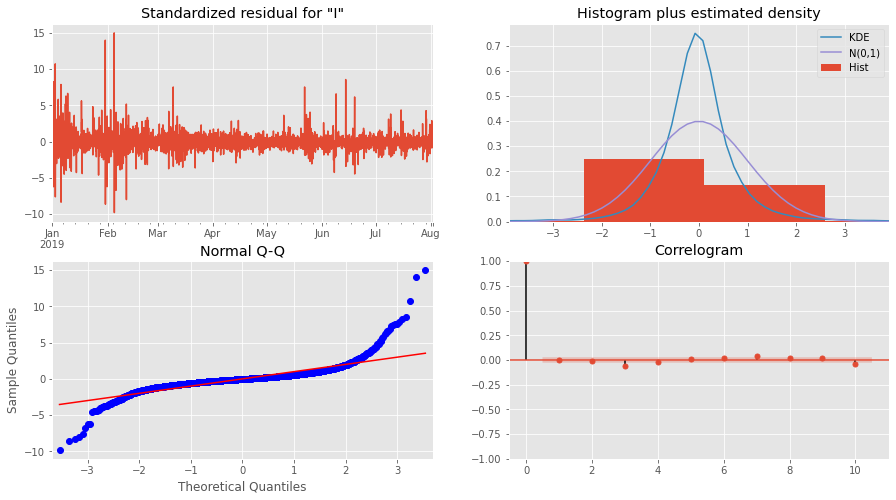

In [ ]:
results.plot_diagnostics()
plt.show()

In [ ]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-len(df_train), dynamic=False)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower IE_sem_price_day_ahead']
upper_limits = confidence_intervals.loc[:,'upper IE_sem_price_day_ahead']

# Print best estimate predictions
print(mean_forecast)

2019-01-01 00:00:00+00:00    58.737254
2019-01-01 01:00:00+00:00    64.435866
2019-01-01 02:00:00+00:00    59.976068
2019-01-01 03:00:00+00:00    57.547229
2019-01-01 04:00:00+00:00    63.868566
                               ...    
2019-08-01 19:00:00+00:00    61.134887
2019-08-01 20:00:00+00:00    58.253872
2019-08-01 21:00:00+00:00    50.272450
2019-08-01 22:00:00+00:00    45.560210
2019-08-01 23:00:00+00:00    41.440924
Freq: H, Name: predicted_mean, Length: 5112, dtype: float64


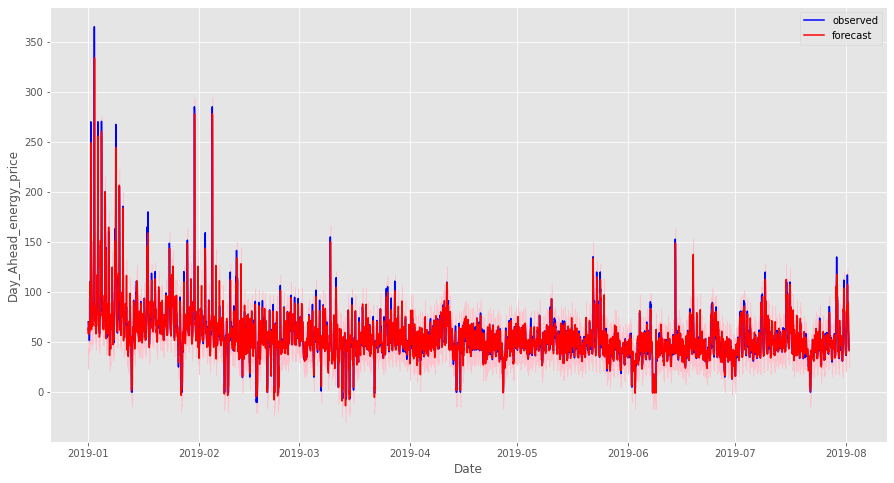

In [ ]:
# plot the IE_day_ahead data
plt.plot(df_train.index, df_train['IE_sem_price_day_ahead'], label='observed',color='b')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Day_Ahead_energy_price')
plt.legend()
plt.show()

In [ ]:
# O modelo consegue prever com um erro médio de 8,7 euros.
np.sqrt(mean_squared_error(df_train['IE_sem_price_day_ahead'], mean_forecast))

8.372473206695238

In [ ]:
# certificar que a variable esta em frequênci'h'
df_extend = df_test['IE_sem_price_day_ahead'].resample('H').mean()

In [ ]:
exog_test = df_test[exogs]

In [ ]:
# ver como o modulo funciona na amostra teste
result_test = results.extend(df_extend, exog_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [ ]:
dynamic_forecast = result_test.get_prediction(start=-len(df_test), dynamic=False)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower IE_sem_price_day_ahead']
upper_limits = confidence_intervals.loc[:,'upper IE_sem_price_day_ahead']

# Print best estimate predictions
print(mean_forecast)

2019-08-02 00:00:00+00:00    39.530640
2019-08-02 01:00:00+00:00    38.534218
2019-08-02 02:00:00+00:00    37.948201
2019-08-02 03:00:00+00:00    38.369237
2019-08-02 04:00:00+00:00    41.757981
                               ...    
2019-12-31 19:00:00+00:00    56.915464
2019-12-31 20:00:00+00:00    44.350473
2019-12-31 21:00:00+00:00    45.955899
2019-12-31 22:00:00+00:00    35.603479
2019-12-31 23:00:00+00:00    42.009720
Freq: H, Name: predicted_mean, Length: 3648, dtype: float64


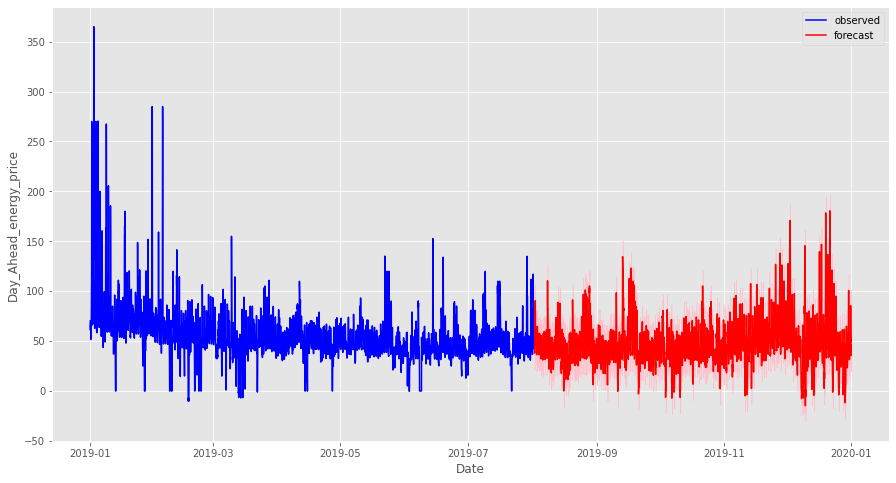

In [ ]:
# plot the IE_day_ahead data
plt.plot(df_train.index, df_train['IE_sem_price_day_ahead'], label='observed',color='b')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Day_Ahead_energy_price')
plt.legend()
plt.show()

In [ ]:
# O erro para a amostra teste é menor aidna para a amostra teste, mostrando que o modelo serve tembem para o periodo escolhido para o teste
print(np.sqrt(mean_squared_error(df_test['IE_sem_price_day_ahead'], mean_forecast)))
print(np.sqrt(mean_squared_error(df_naive['IE_sem_price_day_ahead'], df_naive['naive1'])))

6.805022682722405
9.50227168865822


In [ ]:
df_test['naive24'] = df_test['IE_sem_price_day_ahead'].shift(24)
df_test['naive1'] = df_test['IE_sem_price_day_ahead'].shift(1)
df_test['roilling'] = df_test['IE_sem_price_day_ahead'].rolling(window = 24).mean()
df_naive = df_test.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# Previsão igenua prevendo o preço de amanhã com o preço de ontem
print(np.sqrt(mean_squared_error(df_naive['IE_sem_price_day_ahead'], df_naive['naive24'])))
print(np.sqrt(mean_squared_error(df_naive['IE_sem_price_day_ahead'], df_naive['roilling'])))

19.915964045913604
18.585163841633975


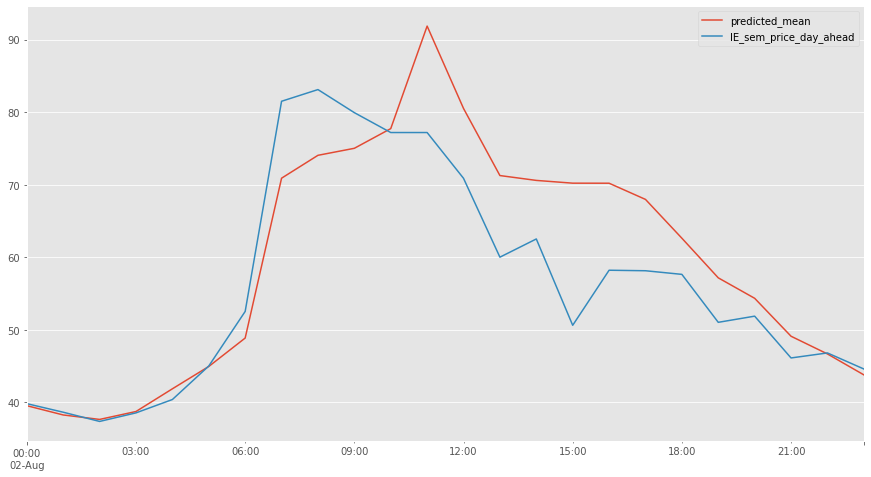

In [ ]:
#Previsão out of sample dia anterior
exog_test = df_test[exogs][0:24].resample('H').mean()
future_forecast = results.forecast(steps = 24, exog = exog_test) #df_test[['Total_load','IE_wind_onshore_generation_actual']]
future_forecast = pd.DataFrame(future_forecast)
future_forecast['IE_sem_price_day_ahead'] = df_test['IE_sem_price_day_ahead'][:24].values
future_forecast.plot()
plt.show()

In [ ]:
start = 0
end = 24
steps = end
result_24 = results


while end <= df_test.shape[0]:

  # amostra dados exógenos
  exog_test = df_test[exogs][start:end].resample('H').mean()
  # previsão
  future_forecast = result_24.forecast(steps = 24, exog = exog_test)
  future_forecast = pd.DataFrame(future_forecast)
  #criar ou juntar os data frames
  if end == 24:
    forecast_24 = future_forecast
  else:
    forecast_24 = pd.concat([forecast_24,future_forecast])

  #extender os dados por um dia
 
  result_24 = result_24.extend(df_test[start:end].resample('H').mean(), exog_test)
  start = end
  end = end + 24
 

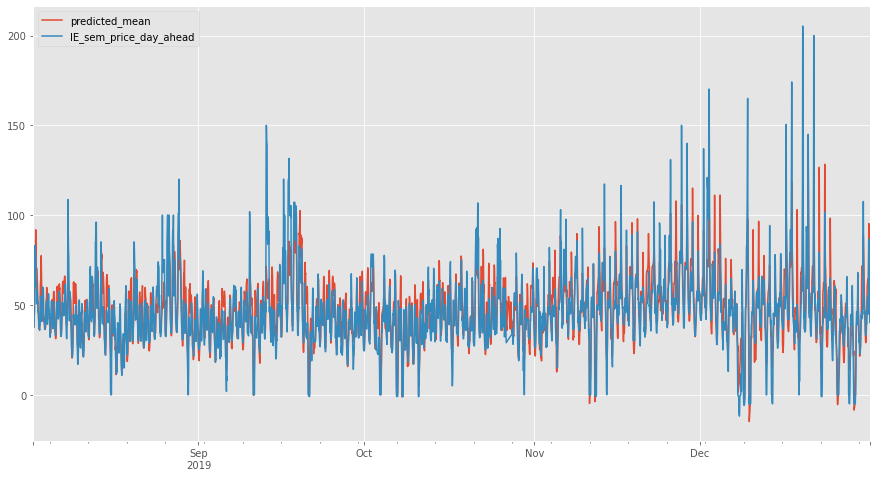

Modelo 11.874308423494826
Igenua 19.915964045913604
media rolante 18.585163841633975


In [ ]:
forecast_24['IE_sem_price_day_ahead'] = df_test['IE_sem_price_day_ahead'].values
forecast_24.plot()
plt.show()
print('Modelo', np.sqrt(mean_squared_error(df_test['IE_sem_price_day_ahead'], forecast_24['predicted_mean'])))
print('Ingenua',np.sqrt(mean_squared_error(df_naive['IE_sem_price_day_ahead'], df_naive['naive'])))
print('media rolante',np.sqrt(mean_squared_error(df_naive['IE_sem_price_day_ahead'], df_naive['roilling'])))

In [ ]:
# Import joblib
import joblib

# Set model name
filename = "Sarimax_model.pkl"

# Pickle it
joblib.dump(results, filename)

['Sarimax_model.pkl']

In [ ]:
results_test = joblib.load('Sarimax_model.pkl')

In [ ]:
solar_wind_IE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   MTU (UTC)                                                8760 non-null   object
 1   Generation - Solar  [MW] Day Ahead/ BZN|IE(SEM)          8760 non-null   object
 2   Generation - Solar  [MW] Intraday / BZN|IE(SEM)          8760 non-null   object
 3   Generation - Solar  [MW] Current / BZN|IE(SEM)           8760 non-null   object
 4   Generation - Wind Offshore  [MW] Day Ahead/ BZN|IE(SEM)  8760 non-null   object
 5   Generation - Wind Offshore  [MW] Intraday / BZN|IE(SEM)  8760 non-null   object
 6   Generation - Wind Offshore  [MW] Current / BZN|IE(SEM)   8760 non-null   object
 7   Generation - Wind Onshore  [MW] Day Ahead/ BZN|IE(SEM)   8760 non-null   int64 
 8   Generation - Wind Onshore  [MW] Intrad

###GARCH

In [ ]:
from sklearn.preprocessing import StandardScaler

###Redes Neurais


In [ ]:
df_ANN = pd.DataFrame(index = df_arima.index)

for c in df_arima.columns:
  df_ANN[c] = df_arima[c].values
  

In [ ]:
df_ANN

In [ ]:
for c in range(24,49):
  a = str(c)
  b = "Price_lag_"+ a
  df_ANN[b] = df_ANN['IE_sem_price_day_ahead'].shift(c)

df_ANN['shifted_rolling'] = df_ANN['IE_sem_price_day_ahead'].rolling(48).mean()
df_ANN['shifted_rolling'] = df_ANN['shifted_rolling'].shift(24)


In [ ]:
df_ANN = df_ANN.dropna()

In [ ]:
lista = list(df_ANN.columns[:])
lista.remove("IE_sem_price_day_ahead")
lista

['IE_sem_load_forecast_entsoe_transparency',
 'IE_sem_wind_forecast',
 'Price_lag_24',
 'Price_lag_25',
 'Price_lag_26',
 'Price_lag_27',
 'Price_lag_28',
 'Price_lag_29',
 'Price_lag_30',
 'Price_lag_31',
 'Price_lag_32',
 'Price_lag_33',
 'Price_lag_34',
 'Price_lag_35',
 'Price_lag_36',
 'Price_lag_37',
 'Price_lag_38',
 'Price_lag_39',
 'Price_lag_40',
 'Price_lag_41',
 'Price_lag_42',
 'Price_lag_43',
 'Price_lag_44',
 'Price_lag_45',
 'Price_lag_46',
 'Price_lag_47',
 'Price_lag_48',
 'shifted_rolling']

In [ ]:
#for c in lista:
#df_ANN[c] = StandardScaler().fit_transform(df_ANN[c].values.reshape(-1, 1))
df_ANN[lista] = StandardScaler().fit_transform(df_ANN[lista])



In [ ]:
df_ANN.info()

In [ ]:
df_train = df_ANN.loc[:'2019-08-01']
df_test  = df_ANN.loc['2019-08-02':]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import sklearn
from keras import regularizers
np.random.seed(1)
tf.random.set_seed(2)
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
df_val = df_train[-730:]
x_train = df_train[:-730].drop('IE_sem_price_day_ahead', axis = 1)
x_test = df_test.drop('IE_sem_price_day_ahead', axis = 1)
y_train = df_train[:-730]['IE_sem_price_day_ahead']#
y_test = df_test['IE_sem_price_day_ahead']#
x_val = df_train[-730:].drop('IE_sem_price_day_ahead', axis = 1)
y_val = df_train[-730:]['IE_sem_price_day_ahead']#

In [ ]:
x_train.shape[1]

28

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model1 = Sequential()
model1.add(Dense(150,input_dim = x_train.shape[1],activation="relu"))
model1.add(Dense(150,activation="relu"))
model1.add(Dense(150,activation="relu"))
model1.add(Dense(150,activation="relu"))
model1.add(Dense(1,activation = "linear"))
model1.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])

In [ ]:
history = model1.fit(x_train.values,y_train.values, validation_data=(x_val,y_val),epochs=40,batch_size=32, shuffle=False)

Epoch 1/40
135/135 [==============================] - 16s 8ms/step - loss: 42.5205 - mean_absolute_error: 42.5205 - val_loss: 14.6990 - val_mean_absolute_error: 14.6990
Epoch 2/40
135/135 [==============================] - 0s 3ms/step - loss: 23.0735 - mean_absolute_error: 23.0735 - val_loss: 11.0583 - val_mean_absolute_error: 11.0583
Epoch 3/40
135/135 [==============================] - 0s 3ms/step - loss: 18.1253 - mean_absolute_error: 18.1253 - val_loss: 9.6089 - val_mean_absolute_error: 9.6089
Epoch 4/40
135/135 [==============================] - 0s 3ms/step - loss: 15.5309 - mean_absolute_error: 15.5309 - val_loss: 9.8568 - val_mean_absolute_error: 9.8568
Epoch 5/40
135/135 [==============================] - 0s 3ms/step - loss: 14.1973 - mean_absolute_error: 14.1973 - val_loss: 9.4748 - val_mean_absolute_error: 9.4748
Epoch 6/40
135/135 [==============================] - 0s 3ms/step - loss: 13.6139 - mean_absolute_error: 13.6139 - val_loss: 9.4948 - val_mean_absolute_error: 9.4948

In [ ]:
result = model1.evaluate(x_test.values,y_test.values)
#Print the results
for i in range(len(model1.metrics_names)):
    print("Metric ",model1.metrics_names[i],":",str(round(result[i],2)))

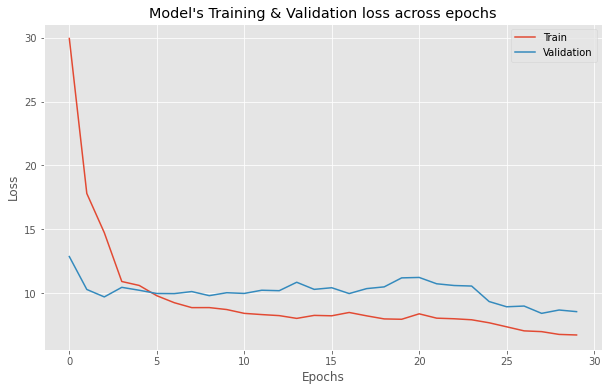

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
prediction_train = model1.predict(x_train)
prediction_test = model1.predict(x_test)

In [ ]:
prediction_ahead = model1.predict(x_test)

In [ ]:

print(np.sqrt(mean_squared_error(y_train, prediction_train)))
print(np.sqrt(mean_squared_error(y_test, prediction_test)))

In [ ]:
prediction_ann = pd.DataFrame(prediction_test, columns=['prediction'])

In [ ]:
prediction_ann['IE_sem_price_day_ahead'] = y_test.values


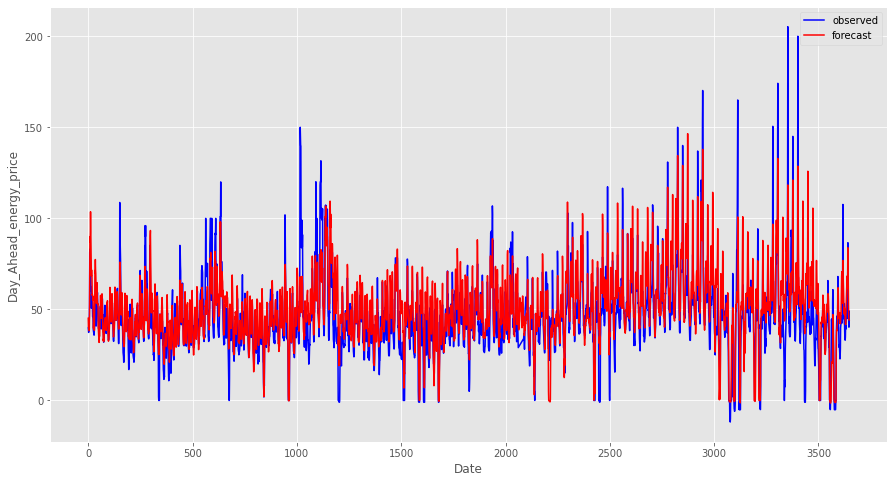

In [ ]:
# plot the IE_day_ahead data
plt.plot(prediction_ann.index, prediction_ann['IE_sem_price_day_ahead'], label='observed',color='b')

# plot your mean predictions
plt.plot(prediction_ann.index, prediction_ann['prediction'], color='r', label='forecast')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Day_Ahead_energy_price')
plt.legend()
plt.show()

In [ ]:
#returns a compiled DNN model
def create_dnn_model():
    model = Sequential()
    model.add(Dense(350, input_dim=28, activation='relu'))
    model.add(Dense(350, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss="mean_squared_error", metrics=["accuracy"], optimizer='adam')
    return model

#Use Keras wrapper to package the model as an sklearn object
model = KerasClassifier(build_fn=create_dnn_model)
# define the grid search parameters
batch_size = [32,64,128]
epochs = [5, 10, 20]
#Create a list with the parameters
param_grid = {"batch_size":batch_size, "epochs":epochs}
#Invoke the grid search method with the list of hyperparameters

grid_model = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
#Train the model
grid_model.fit(x_train, y_train)
#Extract the best model grid search
best_model = grid_model.best_estimator_

In [ ]:
prediction_train = best_model.predict(x_train)
prediction_test = best_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

In [ ]:
print(np.sqrt(mean_squared_error(y_train, prediction_train)))
print(np.sqrt(mean_squared_error(y_test, prediction_test)))

67.59901479121172
59.55288134728116


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8
plt.style.use('ggplot')

In [ ]:
# Decompondo os valores dos preços
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8
plt.style.use('ggplot')

###LSTM


In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
lista

['IE_sem_load_forecast_entsoe_transparency',
 'IE_sem_wind_forecast',
 'Price_lag_24',
 'Price_lag_25',
 'Price_lag_26',
 'Price_lag_27',
 'Price_lag_28',
 'Price_lag_29',
 'Price_lag_30',
 'Price_lag_31',
 'Price_lag_32',
 'Price_lag_33',
 'Price_lag_34',
 'Price_lag_35',
 'Price_lag_36',
 'Price_lag_37',
 'Price_lag_38',
 'Price_lag_39',
 'Price_lag_40',
 'Price_lag_41',
 'Price_lag_42',
 'Price_lag_43',
 'Price_lag_44',
 'Price_lag_45',
 'Price_lag_46',
 'Price_lag_47',
 'Price_lag_48',
 'shifted_rolling']

In [ ]:
time_steps = 24
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(df_train[['IE_sem_load_forecast_entsoe_transparency','IE_sem_wind_forecast','Price_lag_24']], df_train.IE_sem_price_day_ahead, time_steps)
X_test, y_test = create_dataset(df_test[['IE_sem_load_forecast_entsoe_transparency','IE_sem_wind_forecast','Price_lag_24']], df_test.IE_sem_price_day_ahead, time_steps)
print(X_train.shape, y_train.shape)

(4993, 48, 3) (4993,)


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=200, input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history1 = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    shuffle=False
)

Epoch 1/20
125/125 [==============================] - 27s 184ms/step - loss: 1089.1831 - val_loss: 377.6780
Epoch 2/20
125/125 [==============================] - 22s 174ms/step - loss: 496.0624 - val_loss: 381.8837
Epoch 3/20
125/125 [==============================] - 22s 173ms/step - loss: 492.7626 - val_loss: 362.9285
Epoch 4/20
125/125 [==============================] - 22s 174ms/step - loss: 469.7395 - val_loss: 337.5396
Epoch 5/20
125/125 [==============================] - 22s 173ms/step - loss: 434.7305 - val_loss: 300.5368
Epoch 6/20
125/125 [==============================] - 22s 173ms/step - loss: 403.3190 - val_loss: 278.0304
Epoch 7/20
125/125 [==============================] - 22s 174ms/step - loss: 368.2453 - val_loss: 221.1803
Epoch 8/20
125/125 [==============================] - 22s 174ms/step - loss: 317.7458 - val_loss: 291.4620
Epoch 9/20
125/125 [==============================] - 22s 173ms/step - loss: 300.9763 - val_loss: 182.4280
Epoch 10/20
125/125 [===============

In [ ]:
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, prediction_train)))
print(np.sqrt(mean_squared_error(y_test, prediction_test)))

23.70441721653951
21.23614978045193


In [ ]:
from keras.callbacks import EarlyStopping
# Setting up an early stop
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
callbacks_list = [earlystop]


In [ ]:
def fit_model(X_train,Y_train,timesteps,hl,lr,batch,epochs):
    X_train = X_train
    Y_train = Y_train

    # Adding Layers to the model
    model = Sequential()
    model.add(keras.layers.LSTM(1,input_shape = (X_train.shape[1],1),return_sequences = True, activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(keras.layers.LSTM(hl[i],activation = 'relu',return_sequences = True))
    model.add(keras.layers.LSTM(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    #print(model.summary())
  
    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs, batch_size = batch, validation_split=0.1,
    verbose = 0, shuffle = False, callbacks=callbacks_list)
    model.reset_states()
    return model, history.history['loss'], history.history['val_loss']

In [ ]:
def evaluate_model(model,test,timesteps):
    X_test = []
    Y_test = []

    # Loop for testing data
    for i in range(timesteps,test.shape[0]):
        X_test.append(test[i-timesteps:i])
        Y_test.append(test[i])
    X_test,Y_test = np.array(X_test),np.array(Y_test)
    #print(X_test.shape,Y_test.shape)
  
    # Prediction Time !!!!
    Y_hat = model.predict(X_test)
    mse = mean_squared_error(Y_test,Y_hat)
    rmse = sqrt(mse)
    r2 = r2_score(Y_test,Y_hat)
    return mse, rmse, r2, Y_test, Y_hat

In [ ]:
timesteps = 40
hl = [100,95]
lr = 1e-3
batch_size = 64
num_epochs = 150

model,train_error,val_error = fit_model(X_train, y_train,timesteps,hl,lr,batch_size,num_epochs)
plt.figure()
plot_error(train_error,val_error)
plt.show()

NameError: ignored

##Implementation

In [ ]:
#carregar preços IE day ahead 2021
day_ahead = pd.read_csv("/content/drive/MyDrive/Trabalho_grupo_análise_séries_temporais/Day_ahead_prices_2021.csv")
day_ahead['MTU (UTC)'].str.split('-', n = 1, expand = True)[0]
day_ahead['UTC'] = day_ahead['MTU (UTC)'].str.split('-', n = 1, expand = True)[0]
day_ahead['UTC'] =day_ahead['UTC'].str.replace('.','-')
day_ahead.index = pd.to_datetime(day_ahead['UTC'])
day_ahead = day_ahead[['Day-ahead Price [EUR/MWh]']]
day_ahead = day_ahead.rename(columns = {'Day-ahead Price [EUR/MWh]':'IE_sem_price_day_ahead'},inplace = False)
day_ahead = day_ahead[:4079]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """


In [ ]:
# IE Load day_ahead_2021
IE_load_forecast = pd.read_csv("/content/drive/MyDrive/Trabalho_grupo_análise_séries_temporais/IE_load_forecast.csv")
IE_load_forecast['Time (UTC)'].str.split('-', n = 1, expand = True)[0]
IE_load_forecast['UTC'] = IE_load_forecast['Time (UTC)'].str.split('-', n = 1, expand = True)[0]
IE_load_forecast['UTC'] =IE_load_forecast['UTC'].str.replace('.','-')
IE_load_forecast.index = pd.to_datetime(IE_load_forecast['UTC'])
IE_load_forecast = IE_load_forecast[['Day-ahead Total Load Forecast [MW] - Ireland (IE)']]
IE_load_forecast = IE_load_forecast[:8256]
IE_load_forecast['IE_sem_load_forecast_entsoe_transparency'] = pd.to_numeric(IE_load_forecast['Day-ahead Total Load Forecast [MW] - Ireland (IE)'])
IE_load_forecast['IE_sem_load_forecast_entsoe_transparency'].interpolate(method='linear', inplace=True)
IE_load_forecast = IE_load_forecast[['IE_sem_load_forecast_entsoe_transparency']]
IE_load_forecast = IE_load_forecast.resample("h").sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """


In [ ]:
#IE_wind_onshore_generation_2021
IE_onshore = pd.read_csv("/content/drive/MyDrive/Trabalho_grupo_análise_séries_temporais/IE_onshore_wind_forecast.csv")
IE_onshore = IE_onshore[['MTU (UTC)','Generation - Wind Onshore  [MW] Day Ahead/ BZN|IE(SEM)']]
IE_onshore['MTU (UTC)'].str.split('-', n = 1, expand = True)[0]
IE_onshore['UTC'] = IE_onshore['MTU (UTC)'].str.split('-', n = 1, expand = True)[0]
IE_onshore['UTC'] =IE_onshore['UTC'].str.replace('.','-')
IE_onshore.index = pd.to_datetime(IE_onshore['UTC'])
IE_onshore = IE_onshore[:4128]
IE_onshore['IE_sem_wind_forecast'] = pd.to_numeric(IE_onshore['Generation - Wind Onshore  [MW] Day Ahead/ BZN|IE(SEM)'])
IE_onshore = IE_onshore[['IE_sem_wind_forecast']]
IE_onshore['IE_sem_wind_forecast'].interpolate(method='linear', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [ ]:
day_ahead_21 = pd.read_csv("/content/drive/MyDrive/Trabalho_grupo_análise_séries_temporais/Day-Ahead_21-06.csv")
day_ahead_21['UTC'] = day_ahead_21['Date'] + " " + day_ahead_21['Time']
day_ahead_21.index = pd.to_datetime(day_ahead_21['UTC'])
day_ahead_21 = day_ahead_21[['EUR']]
day_ahead_21 = day_ahead_21.rename(columns = {'EUR' :'IE_sem_price_day_ahead'},inplace = False)

In [ ]:
day_ahead = pd.concat([day_ahead,day_ahead_21])

In [ ]:
#day_ahead['IE_sem_price_day_ahead'] = pd.to_numeric(day_ahead['IE_sem_price_day_ahead'])
X_train = X_train.resample('H').backfill(25)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8088 entries, 2021-01-04 00:00:00 to 2021-12-06 23:00:00
Freq: H
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   IE_sem_wind_forecast                      8088 non-null   float64
 1   IE_sem_price_day_ahead                    8064 non-null   object 
 2   IE_sem_load_forecast_entsoe_transparency  8088 non-null   float64
dtypes: float64(2), object(1)
memory usage: 252.8+ KB


In [ ]:
df_implement = IE_onshore.merge(day_ahead, how='left', left_index=True, right_index=True)

In [ ]:
df_implement['IE_sem_load_forecast_entsoe_transparency'] = IE_load_forecast['IE_sem_load_forecast_entsoe_transparency'][:4128].values

In [ ]:
#Pegar os valores até as 22h
Trues = X_train['IE_sem_price_day_ahead'].isna()

In [ ]:
X_train = X_train[1000:]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2078 entries, 2021-03-25 08:00:00 to 2021-06-19 21:00:00
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   IE_sem_wind_forecast                      2078 non-null   float64
 1   IE_sem_price_day_ahead                    2054 non-null   object 
 2   IE_sem_load_forecast_entsoe_transparency  2078 non-null   float64
dtypes: float64(2), object(1)
memory usage: 64.9+ KB


In [ ]:
l = list(df_implement.columns)

In [ ]:
X_train = df_implement.iloc[:4078]

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4078 entries, 2021-01-01 00:00:00 to 2021-06-19 21:00:00
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   IE_sem_wind_forecast                      4078 non-null   float64
 1   IE_sem_price_day_ahead                    4054 non-null   object 
 2   IE_sem_load_forecast_entsoe_transparency  4078 non-null   float64
dtypes: float64(2), object(1)
memory usage: 127.4+ KB


In [ ]:
for c in range(24,49):
  a = str(c)
  b = "Price_lag_"+ a
  df_implement[b] = df_implement['IE_sem_price_day_ahead'].shift(c)

df_implement['shifted_rolling'] = df_implement['IE_sem_price_day_ahead'].rolling(48).mean()
df_implement['shifted_rolling'] = df_implement['shifted_rolling'].shift(24)

In [ ]:
lista2 = list(df_implement.columns[:])
lista2.remove("IE_sem_price_day_ahead")
lista2

['IE_sem_wind_forecast',
 'IE_sem_load_forecast_entsoe_transparency',
 'Price_lag_24',
 'Price_lag_25',
 'Price_lag_26',
 'Price_lag_27',
 'Price_lag_28',
 'Price_lag_29',
 'Price_lag_30',
 'Price_lag_31',
 'Price_lag_32',
 'Price_lag_33',
 'Price_lag_34',
 'Price_lag_35',
 'Price_lag_36',
 'Price_lag_37',
 'Price_lag_38',
 'Price_lag_39',
 'Price_lag_40',
 'Price_lag_41',
 'Price_lag_42',
 'Price_lag_43',
 'Price_lag_44',
 'Price_lag_45',
 'Price_lag_46',
 'Price_lag_47',
 'Price_lag_48',
 'shifted_rolling']

In [ ]:
df_implement[lista2] = StandardScaler().fit_transform(df_implement[lista2])

In [ ]:
df_last = df_implement[-24:].drop('IE_sem_price_day_ahead', axis = 1)

In [ ]:
tomorrow = model1.predict(df_last)

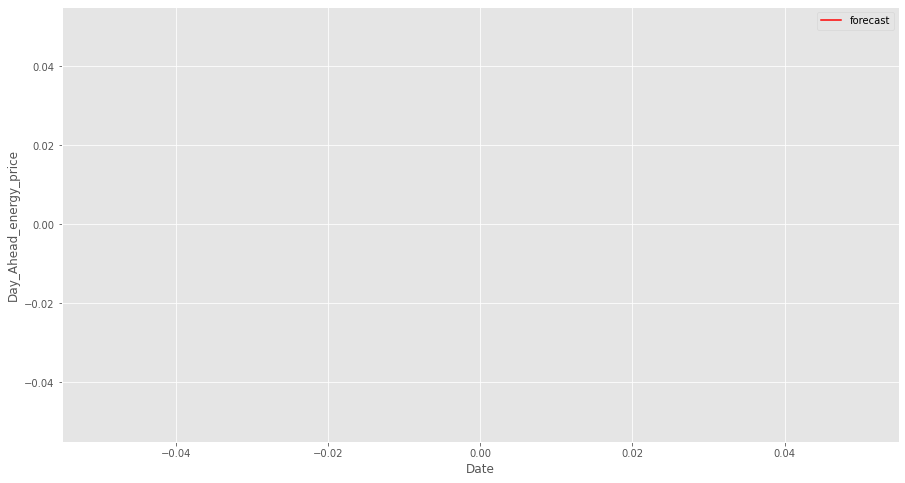

In [ ]:
prediction_tomorrow = pd.DataFrame(tomorrow, columns=['prediction'])

# plot your mean predictions
plt.plot(prediction_tomorrow.index, prediction_tomorrow['prediction'], color='r', label='forecast')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Day_Ahead_energy_price')
plt.legend()
plt.show()

###SARIMAX


In [ ]:
exog_test = df_implement[exogs][0:24].resample('H').mean()
future_forecast = results.get_prediction(endog = df_implement['IE_sem_price_day_ahead'].dropna(), steps = 24, exog = exog_test)

In [ ]:
implement_x = df_implement.drop('IE_sem_price_day_ahead', axis = 1).dropna()
implement_x = implement_x[:-24]

In [ ]:
implement_y = df_implement['IE_sem_price_day_ahead'].dropna()

In [ ]:
implement_y = implement_y[71:].resm

In [ ]:
implement_y = implement_y.resample('H').mean()

In [ ]:
implement_x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8136 entries, 2021-01-02 00:00:00 to 2021-12-06 23:00:00
Freq: H
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   IE_sem_wind_forecast                      4032 non-null   float64
 1   IE_sem_load_forecast_entsoe_transparency  4032 non-null   float64
 2   Price_lag_24                              4032 non-null   float64
 3   Price_lag_25                              4032 non-null   float64
 4   Price_lag_26                              4032 non-null   float64
 5   Price_lag_27                              4032 non-null   float64
 6   Price_lag_28                              4032 non-null   float64
 7   Price_lag_29                              4032 non-null   float64
 8   Price_lag_30                              4032 non-null   float64
 9   Price_lag_31                              4032 non-null   float

In [ ]:
exog_test = implement_x[['IE_sem_wind_forecast', 'IE_sem_load_forecast_entsoe_transparency']]

In [ ]:
exog_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4032 entries, 2021-03-01 23:00:00 to 2021-06-20 22:00:00
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   IE_sem_wind_forecast                      4032 non-null   float64
 1   IE_sem_load_forecast_entsoe_transparency  4032 non-null   float64
dtypes: float64(2)
memory usage: 94.5 KB


In [ ]:
# ver como o modulo funciona na amostra teste
result_tomorrow = results.extend(implement_y, exog_test)